In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()

In [4]:
X = data["data"]
y= data['target']

In [5]:
from keras import layers
from keras import Sequential
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [12]:
X_train.shape

(16512, 8)

In [46]:
model = Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (8,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear'))

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                576       
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                

In [48]:
model.compile(optimizer="adam", loss="mse",metrics=["mse"])

In [49]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
413/413 [==============================] - 2s 3ms/step - loss: 251.3395 - mse: 251.3395 - val_loss: 4.1277 - val_mse: 4.1277
Epoch 2/25
413/413 [==============================] - 3s 7ms/step - loss: 6.6507 - mse: 6.6507 - val_loss: 3.4045 - val_mse: 3.4045
Epoch 3/25
413/413 [==============================] - 1s 3ms/step - loss: 3.0690 - mse: 3.0690 - val_loss: 1.6236 - val_mse: 1.6236
Epoch 4/25
413/413 [==============================] - 1s 3ms/step - loss: 1.8334 - mse: 1.8334 - val_loss: 1.4100 - val_mse: 1.4100
Epoch 5/25
413/413 [==============================] - 1s 2ms/step - loss: 1.5565 - mse: 1.5565 - val_loss: 1.3794 - val_mse: 1.3794
Epoch 6/25
413/413 [==============================] - 1s 2ms/step - loss: 1.5065 - mse: 1.5065 - val_loss: 1.3664 - val_mse: 1.3664
Epoch 7/25
413/413 [==============================] - 1s 2ms/step - loss: 1.4222 - mse: 1.4222 - val_loss: 1.3231 - val_mse: 1.3231
Epoch 8/25
413/413 [==============================] - 1s 2ms/step - loss

In [50]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

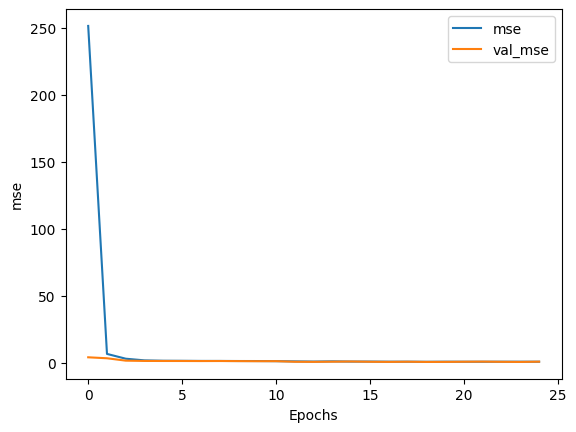

In [51]:
plot_history(history, "mse")

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
evaluate_model(y_test, model.predict(X_test))

129/129 [==============================] - 1s 2ms/step


(0.7065674195477204, 0.9519619507044346, 0.3358753101362384)